<a href="https://colab.research.google.com/github/tiagosardi/emotionrecognition/blob/main/human_emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone  https://github.com/tiagosardi/emotionrecognition.git

Cloning into 'emotionrecognition'...
remote: Enumerating objects: 34074, done.
remote: Counting objects: 100% (34074/34074), done.
remote: Compressing objects: 100% (34073/34073), done.
remote: Total 34074 (delta 8), reused 34055 (delta 0), pack-reused 0
Receiving objects: 100% (34074/34074), 57.67 MiB | 23.98 MiB/s, done.
Resolving deltas: 100% (8/8), done.
Checking out files: 100% (35889/35889), done.


In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"monange","key":"c7d18689bd5833f557d6640f1ec443fc"}'}

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              234KB  2021-08-04 12:58:15          10312  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           6302  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2361  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2585  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

In [7]:
!kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge

  0% 0.00/7.01k [00:00<?, ?B/s]
100% 7.01k/7.01k [00:00<00:00, 13.1MB/s]
 92% 89.0M/96.6M [00:05<00:00, 12.2MB/s]
100% 96.6M/96.6M [00:05<00:00, 19.7MB/s]
 47% 9.00M/19.3M [00:01<00:02, 4.78MB/s]
100% 19.3M/19.3M [00:01<00:00, 11.4MB/s]
 88% 81.0M/92.0M [00:02<00:00, 29.8MB/s]
100% 92.0M/92.0M [00:02<00:00, 39.8MB/s]
 94% 73.0M/77.3M [00:04<00:00, 14.1MB/s]
100% 77.3M/77.3M [00:04<00:00, 18.7MB/s]


In [8]:
!unzip train.csv.zip -d train

Archive:  train.csv.zip
  inflating: train/train.csv         


In [9]:
!unzip test.csv.zip -d test

Archive:  test.csv.zip
  inflating: test/test.csv           


In [10]:
!tar -vzxf fer2013.tar.gz

fer2013/fer2013.csv
fer2013/README
fer2013/fer2013.bib
fer2013/


In [11]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow

In [12]:
data = pd.read_csv('fer2013/fer2013.csv')

In [13]:
data.tail()

,emotion,pixels,Usage
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest
35886,2,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...,PrivateTest


Text(0.5, 1.0, 'Img X emotions')

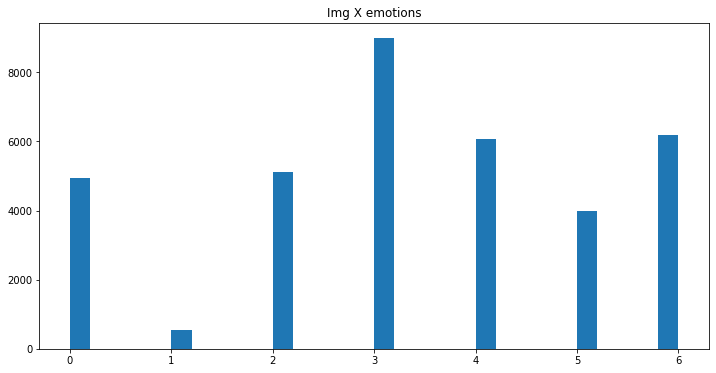

In [14]:
plt.figure(figsize=(12,6))
plt.hist(data['emotion'], bins= 30)
plt.title('Img X emotions')

In [15]:
height, width = 48,48
faces = []
samples = 0
for pixel_sequence in  pixels:
  face = [int(pixel) for pixel in pixel_sequence.split(' ')]
  face = np.asarray(face).reshape(height,width)
  faces.append(face)

  if(samples<10):
    cv2_imshow(face)
  amostras+=1

NameError: ignored